The coin-tossing data can be used to illustrate the normal approximation to the binomial. By chopping the data into strings of length $64$, each string represents $64$ independent Bernoulli trials. The number of $1$s in each string is then a Binomial$(64, p)$ random variable. Combining this year’s and the previous years’ data there are enough to generate $2124$ such Binomial$(64, p)$ random variables.

#### Exercise 1.1

Plot the histogram against the Binomial$(64, p)$ probability mass function and plot the empirical cdf against the Binomial cdf. Note that both R and Math- ematica have at least three ways to calculate the bins for use in a histogram, the Sturges method, Freedman–Diaconis or FD method, and the Scott method. Pro- vide a histogram for each of the three methods. Use p = 0.5. Say something intelligent about the plots to show that you have looked at them.

In [1]:
from scipy.special import binom

In [2]:
# data as strings
f = open("bin_data.txt", "r").readlines()
#print(f)
# data as integers
f = [int(value[:-1]) for value in f]
f.sort()
#print(f)
#print(f)

In [3]:
# analytic values of Bonomial(64,p) probability mass function
BNp = {}
N = 64
p = 0.5
for i in range(0, N+1):
    BNp[i] = binom(N, i) * p**i * (1-p)**(N-i)

In [4]:
from matplotlib import pyplot as plt

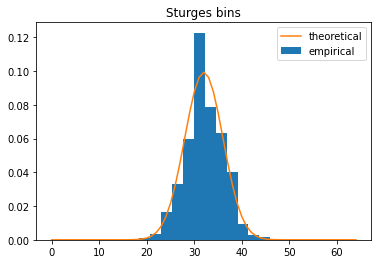

In [5]:
plt.clf()
# Sturges method
plt.hist(f, bins='sturges', density='True', label='empirical')
plt.plot(BNp.keys(), BNp.values(), label='theoretical')
plt.legend()
plt.title("Sturges bins")
plt.show()

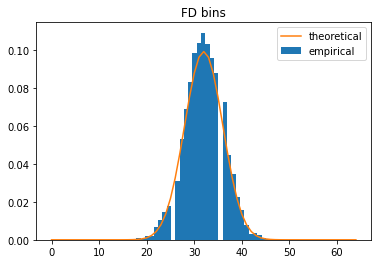

In [6]:
plt.clf()
#  Freedman–Diaconis
plt.hist(f, bins='fd', density='True', label='empirical')
plt.plot(BNp.keys(), BNp.values(), label='theoretical')
plt.legend()
plt.title("FD bins")
plt.show()

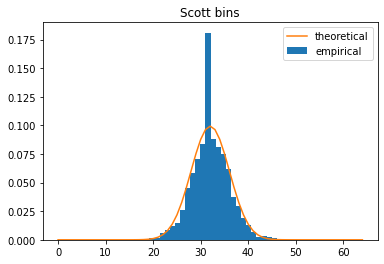

In [7]:
plt.clf()
# Scott method
plt.hist(f, bins='scott', density='True', label='empirical')
plt.plot(BNp.keys(), BNp.values(), label='theoretical')
plt.legend()
plt.title("Scott bins")
plt.show()
plt.show()

In [8]:
# empirical distribution function for f
# Note: this might not work for non-integer valued cdfs!
# Value will instead have to loop over range of f
fcdf = {}
for value in range(min(f), max(f)+1):
    # count the number of fs <= value
    fcdf[value] = sum([int(x<=value) for x in f])/len(f)
#print(fcdf)

In [9]:
BNpcdf = {}
for value in range(0, N+1):
    # sum everything up to and including value
    BNpcdf[value] = sum(list(BNp.values())[:value+1])

In [10]:
#print(BNpcdf)

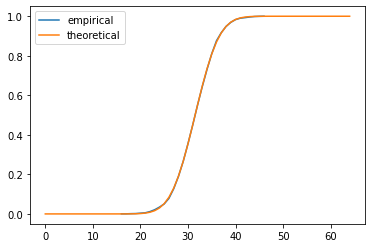

In [11]:
# plot cdf
plt.plot(fcdf.keys(), fcdf.values(), label='empirical')
plt.plot(BNpcdf.keys(), BNpcdf.values(), label='theoretical')
plt.legend()
plt.show()

This is kind of incredible!  It's WAAAY easier to see the fit when you plot the cdf vs the bins. $\square$

#### Exercise 1.2

Assuming $p = 0.5$, standardize each variable. Plot the histograms and empirical distribution. Superimpose the standard normal density on the histogram, and superimpose the empirical distribution and cdf. Print and submit your plots. Using the “eyeball criterion,” how good does this look? Which method, the histogram or the empirical distribution, seems to be better?

In [14]:
import numpy as np

In [69]:
# standardize each variable: X* = (X-\mu)/\sigma
fmean = np.mean(f)
fsigma = np.var(f)**0.5
#print(fmean)
#print(fsigma)
standardized_f = [(value-fmean)/fsigma for value in f]
#print(standardized_f)

[-3.9532796924214506, -3.4591197308687693, -3.4591197308687693, -3.212039750092429, -2.964959769316088, -2.964959769316088, -2.964959769316088, -2.964959769316088, -2.717879788539747, -2.717879788539747, -2.717879788539747, -2.717879788539747, -2.470799807763407, -2.470799807763407, -2.470799807763407, -2.470799807763407, -2.470799807763407, -2.470799807763407, -2.470799807763407, -2.470799807763407, -2.470799807763407, -2.470799807763407, -2.470799807763407, -2.470799807763407, -2.470799807763407, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -2.223719826987066, -1.9766398462107253, -1.9766398462107253, -1.9766398462107253, -1.9766398462107253, -1.976639846

In [67]:
# standardized f above is correct, but for some reason
# pyplot doesn't plot it correctly
# So in this cell we do some further formatting that'll allow us
# to better visualize the data
temp_f = {}
for value in set(standardized_f):
    # count number of times the value appears
    temp_f[value] = sum([int(value==val) for val in standardized_f])/len(standardized_f)
final_f = {}
for key in sorted(list(temp_f.keys())):
    final_f[key] = temp_f[key]
#print(final_f)
# print(final_f.keys())

dict_keys([-3.9532796924214506, -3.4591197308687693, -3.212039750092429, -2.964959769316088, -2.717879788539747, -2.470799807763407, -2.223719826987066, -1.9766398462107253, -1.7295598654343847, -1.482479884658044, -1.2353999038817034, -0.9883199231053627, -0.741239942329022, -0.4941599615526813, -0.24707998077634066, 0.0, 0.24707998077634066, 0.4941599615526813, 0.741239942329022, 0.9883199231053627, 1.2353999038817034, 1.482479884658044, 1.7295598654343847, 1.9766398462107253, 2.223719826987066, 2.470799807763407, 2.717879788539747, 2.964959769316088, 3.212039750092429, 3.4591197308687693])


In [63]:
# standardize each variable: X* = (X-\mu)/\sigma
Bnpmean = N*p
Bnpsigma = (N*p*(1-p))**0.5
standardized_Bnp = {(key-Bnpmean)/Bnpsigma: value for key,value in BNp.items()}
print(standardized_Bnp)
print(sum([value for value in standardized_Bnp.values()]))

{-8.0: 5.421010862427522e-20, -7.75: 3.469446951953614e-18, -7.5: 1.0928757898653885e-16, -7.25: 2.258609965721803e-15, -7.0: 3.4443801977257493e-14, -6.75: 4.133256237270899e-13, -6.5: 4.064368633316384e-12, -6.25: 3.367619724747861e-11, -6.0: 2.399429053882851e-10, -5.75: 1.4929780779715518e-09, -5.5: 8.211379428843535e-09, -5.25: 4.03104081052319e-08, -5.0: 1.7803763579810755e-07, -4.75: 7.121505431924302e-07, -4.5: 2.5942626930581386e-06, -4.25: 8.647542310193795e-06, -4.0: 2.64830983249685e-05, -3.75: 7.477580703520517e-05, -3.5: 0.00019524794059192464, -3.25: 0.0004727055403804491, -3.0: 0.0010635874658560106, -2.75: 0.0022284689760792603, -2.5: 0.00435564390779128, -2.25: 0.007953784527271033, -2.0: 0.013587715234088013, -1.75: 0.021740344374540838, -1.5: 0.032610516561811236, -1.25: 0.04589628256847509, -1.0: 0.0606486591083421, -0.75: 0.07528799061725223, -0.5: 0.0878359890534609, -0.25: 0.09633624605863457, 0.0: 0.09934675374796689, 0.25: 0.09633624605863457, 0.5: 0.087835989

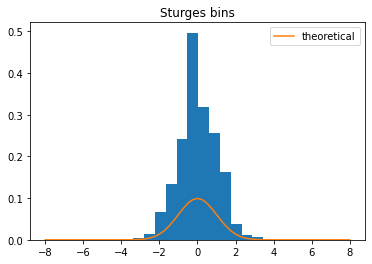

In [74]:
plt.clf()
# Sturges method
# plt.plot(final_f.keys(), final_f.values(), label='empirical')
plt.hist(standardized_f, bins='sturges', density='True')
plt.plot(standardized_Bnp.keys(), standardized_Bnp.values(), label='theoretical')
plt.legend()
plt.title("Sturges bins")
plt.show()

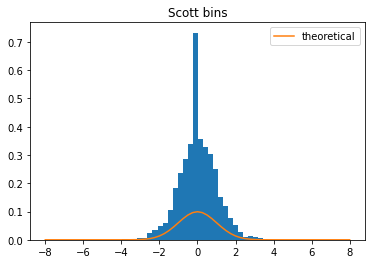

In [78]:
plt.clf()
# Scott method
# plt.plot(final_f.keys(), final_f.values(), label='empirical')
plt.hist(standardized_f, bins='scott', density='True')
plt.plot(standardized_Bnp.keys(), standardized_Bnp.values(), label='theoretical')
plt.legend()
plt.title("Scott bins")
plt.show()

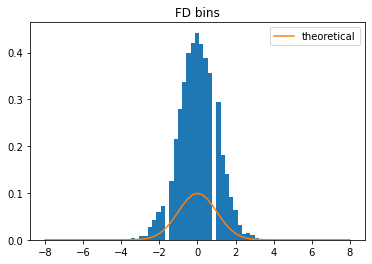

In [79]:
plt.clf()
# FD method
# plt.plot(final_f.keys(), final_f.values(), label='empirical')
plt.hist(standardized_f, bins='fd', density='True')
plt.plot(standardized_Bnp.keys(), standardized_Bnp.values(), label='theoretical')
plt.legend()
plt.title("FD bins")
plt.show()

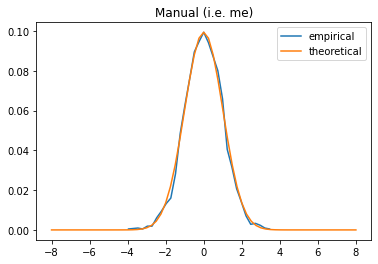

In [77]:
plt.clf()
# my method
plt.plot(final_f.keys(), final_f.values(), label='empirical')
plt.plot(standardized_Bnp.keys(), standardized_Bnp.values(), label='theoretical')
plt.legend()
plt.title("Manual (i.e. me)")
plt.show()

In [81]:
from math import exp, pi

In [87]:
# standard normal density
standard_normal_density = {}
for key in standardized_Bnp.keys():
    standard_normal_density[key] = exp(-(key)**2/2)/ ((2*pi)**0.5)
print(standard_normal_density)   

{-8.0: 5.052271083536893e-15, -7.75: 3.618294451112518e-14, -7.5: 2.43432053302901e-13, -7.25: 1.538537950561275e-12, -7.0: 9.134720408364595e-12, -6.75: 5.094937958843684e-11, -6.5: 2.669556614762852e-10, -6.25: 1.314001818155884e-09, -6.0: 6.075882849823286e-09, -5.75: 2.6392432035705735e-08, -5.5: 1.0769760042543276e-07, -5.25: 4.1284709886299984e-07, -5.0: 1.4867195147342979e-06, -4.75: 5.029507288592446e-06, -4.5: 1.5983741106905478e-05, -4.25: 4.771863654120495e-05, -4.0: 0.00013383022576488537, -3.75: 0.00035259568236744546, -3.5: 0.0008726826950457602, -3.25: 0.002029048057299768, -3.0: 0.0044318484119380075, -2.75: 0.009093562501591053, -2.5: 0.01752830049356854, -2.25: 0.03173965183566742, -2.0: 0.05399096651318806, -1.75: 0.08627731882651153, -1.5: 0.12951759566589174, -1.25: 0.18264908538902191, -1.0: 0.24197072451914337, -0.75: 0.30113743215480443, -0.5: 0.3520653267642995, -0.25: 0.3866681168028493, 0.0: 0.3989422804014327, 0.25: 0.3866681168028493, 0.5: 0.352065326764299

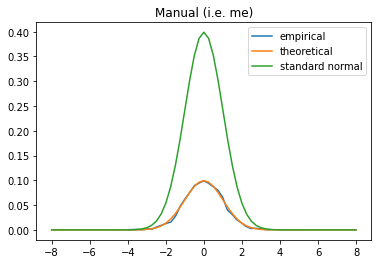

In [88]:
plt.clf()
# my method
plt.plot(final_f.keys(), final_f.values(), label='empirical')
plt.plot(standardized_Bnp.keys(), standardized_Bnp.values(), label='theoretical')
plt.plot(standard_normal_density.keys(), standard_normal_density.values(), label='standard normal')
plt.legend()
plt.title("Manual (i.e. me)")
plt.show()

In [89]:
# If we divide by 4, things work out
# standard normal density
standard_normal_density = {}
for key in standardized_Bnp.keys():
    standard_normal_density[key] = exp(-(key)**2/2)/ ((2*pi)**0.5) / 4
print(standard_normal_density) 

{-8.0: 1.2630677708842232e-15, -7.75: 9.045736127781295e-15, -7.5: 6.085801332572525e-14, -7.25: 3.8463448764031875e-13, -7.0: 2.283680102091149e-12, -6.75: 1.273734489710921e-11, -6.5: 6.67389153690713e-11, -6.25: 3.28500454538971e-10, -6.0: 1.5189707124558215e-09, -5.75: 6.598108008926434e-09, -5.5: 2.692440010635819e-08, -5.25: 1.0321177471574996e-07, -5.0: 3.7167987868357447e-07, -4.75: 1.2573768221481116e-06, -4.5: 3.9959352767263695e-06, -4.25: 1.1929659135301238e-05, -4.0: 3.345755644122134e-05, -3.75: 8.814892059186137e-05, -3.5: 0.00021817067376144004, -3.25: 0.000507262014324942, -3.0: 0.0011079621029845019, -2.75: 0.0022733906253977632, -2.5: 0.004382075123392135, -2.25: 0.007934912958916854, -2.0: 0.013497741628297016, -1.75: 0.021569329706627883, -1.5: 0.032379398916472936, -1.25: 0.04566227134725548, -1.0: 0.06049268112978584, -0.75: 0.07528435803870111, -0.5: 0.08801633169107488, -0.25: 0.09666702920071232, 0.0: 0.09973557010035818, 0.25: 0.09666702920071232, 0.5: 0.0880

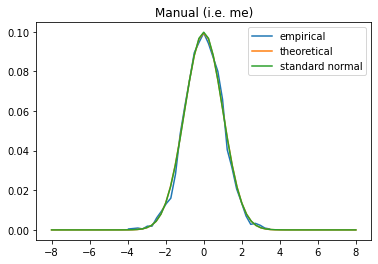

In [90]:
plt.clf()
# my method
plt.plot(final_f.keys(), final_f.values(), label='empirical')
plt.plot(standardized_Bnp.keys(), standardized_Bnp.values(), label='theoretical')
plt.plot(standard_normal_density.keys(), standard_normal_density.values(), label='standard normal')
plt.legend()
plt.title("Manual (i.e. me)")
plt.show()

In [91]:
from scipy.stats import norm

In [95]:
print(norm.cdf(0))

0.5


### Haven't finished above...just visualization stuff
### Complete if you have extra time